## Bibliotecas Usadas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

## Hiperparâmetros e constantes

In [2]:
a = 0.5
err = 0.000001
limit = 50000
random.seed(7)

## Leitura dos dados

A função abaixo abre os arquivos onde estão salvos os dados e os salva em três listas de features.

In [3]:
def readData(path):
    try:
        f = open(path)
    except:
        print("Houston we've got a file problem")
        return
    dataset = [[],[],[]]
    for i in f:
        stringList = i.split()
        try:
            for j in range(len(dataset)):
                if j < len(stringList):
                    dataset[j].append(float(stringList[j]))
                else:
                    f.close()
                    return
        except ValueError:
            print("You had a Value Error")
            f.close()
            return
        except:
            print("You got another Error")
            f.close()
            return
    f.close()
    return dataset

Esta função separa os dados em conjunto de treino e conjunto de teste.

In [4]:
def splitData(dataset):
    trainset = [0,1,2]
    testset = [0,1,2]
    trainset[0], testset[0], trainset[1], testset[1], trainset[2], testset[2] = train_test_split(dataset[0], dataset[1], dataset[2], test_size=0.1, random_state=7)
    return trainset, testset

Esta outra transforma as listas de features em uma lista de pontos.

In [5]:
def getPointList(dataset):
    pointList = []
    for i in range(len(dataset[0])):
        point = []
        for j in dataset:
            point.append(j[i])
        pointList.append(point)
    return pointList

In [6]:
def getList(points):
    lists = []
    for i in range(len(points[0])):
        lists.append([])
    for i in points:
        for j in range(len(i)):
            lists[j].append(i[j])
    return lists

## Plotando gráficos

In [7]:
def plotPoints(dataset):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    X, Y =  np.meshgrid(np.linspace(-3,3,2), np.linspace(0,2,2))
    Z =  np.zeros(X.shape)
    ax.plot_surface(X, Y, Z, shade=False, color="g", alpha=.4)
    ax.plot([-2.5, -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir='z', zs=0, c='g')
    ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir='z', zs=0, c='g')
    ax.scatter(dataset[0],dataset[1],dataset[2])
    return ax

In [8]:
def plotPolynom(dataset,X,Y,Z):
    ax = plotPoints(dataset)
    ax.plot(X,Y,Z)

## Conseguindo Pontos de entrada

In [9]:
def gettingX(start,end,step):
    lengh = end - start + step
    numb = int(lengh/step)
    x = np.linspace(start,end,num = numb)
    return x

# Regressão Linear

In [10]:
def linearRegression(a,x,y,theta,err):
    epoch = 0
    difference = 50
    prevJ = j(linearH,theta,x,y)
    while(difference > err):
        if (epoch > limit):
            break
        temp0 = theta[0] - a*derivative0(linearH,theta,x,y)
        temp1 = theta[1] - a*derivative1(linearH,theta,x,y)
        theta[0] = temp0
        theta[1] = temp1
        nowJ = j(linearH,theta,x,y)
        dif = abs(nowJ - prevJ)
        difference = dif/prevJ
        epoch += 1
        prevJ = nowJ
    print(epoch)
    print(j(linearH,theta,x,y))
    pass

In [11]:
def j(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += math.pow(h(theta,x[i]) - y[i],2)
    return summ/(2*length)

In [12]:
def linearH(theta,x):
    return theta[0] + theta[1]*x

In [13]:
def derivative0(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += h(theta,x[i]) - y[i]
    return summ/length

In [14]:
def derivative1(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += (h(theta,x[i]) - y[i])*x[i]
    return summ/length

## Regressão Polinomial

In [15]:
def generalH(theta,x):
    summ = 0
    for i in range(len(theta)):
        summ += theta[i]*pow(x,i)
    return summ

In [16]:
def derivative(h,theta,x,y,grau):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += (h(theta,x[i]) - y[i])*pow(x[i],grau)
    return summ/length

In [17]:
def polynomialRegression(a,x,y,theta,err,grau):
    epoch = 0
    while(epoch < limit):
        temp = [0]*(grau+1)
        temp[0] = theta[0] - a*derivative0(generalH,theta,x,y)
        for i in range(1,grau+1):
            temp[i] = theta[i] - a*derivative(generalH,theta,x,y,i)
        for i in range(len(temp)):
            theta[i] = temp[i]
        epoch += 1
    print(epoch)
    print(j(generalH,theta,x,y))
    pass

## Erro

In [18]:
def mse(ye,y):
    lengh = len(y)
    summ = 0
    for i in range(lengh):
        summ += pow(ye[i] - y[i], 2)
    result = summ/lengh
    return result

In [19]:
def rmse(ye,y):
    result = math.sqrt(mse(ye,y))
    return result

In [20]:
def rse(ye,y):
    mean = np.mean(y)
    summ = 0
    summ2 = 0
    lengh = len(y)
    for i in range(lengh):
        summ += pow(y[i] - mean, 2)
        summ2 += pow(ye[i] - y[i], 2)
    result = summ2/summ
    return result

## Execução

### Aquisição dos dados

In [21]:
dataset = readData("../data/kick1.dat")
print(dataset)

[[-0.21, -0.305, -0.368, -0.37, -0.48, -0.532, -0.575, -0.583, -0.618, -0.702, -0.783, -0.842, -0.882, -0.93, -0.969, -0.989, -1.032, -1.088, -1.104, -1.192], [2.048, 1.999, 1.968, 1.902, 1.841, 1.807, 1.733, 1.69, 1.649, 1.611, 1.568, 1.523, 1.438, 1.408, 1.34, 1.295, 1.244, 1.201, 1.159, 1.109], [0.145, 0.103, 0.149, 0.11, 0.135, 0.111, 0.12, 0.111, 0.108, 0.117, 0.107, 0.104, 0.139, 0.142, 0.111, 0.107, 0.118, 0.119, 0.126, 0.11]]


In [22]:
dataset2 = readData("../data/kick2.dat")
print(dataset2)

[[-0.105, -0.162, -0.184, -0.185, -0.23, -0.266, -0.287, -0.311, -0.309, -0.331, -0.391, -0.431, -0.441, -0.445, -0.484, -0.514, -0.516, -0.524, -0.552, -0.596], [2.048, 1.999, 1.968, 1.902, 1.841, 1.807, 1.733, 1.69, 1.649, 1.611, 1.568, 1.523, 1.438, 1.408, 1.34, 1.295, 1.244, 1.201, 1.159, 1.109], [0.145, 0.177, 0.172, 0.167, 0.192, 0.219, 0.213, 0.223, 0.25, 0.244, 0.233, 0.269, 0.283, 0.29, 0.263, 0.29, 0.28, 0.281, 0.296, 0.269]]


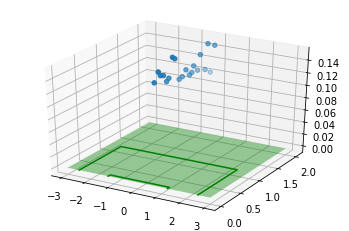

In [23]:
plotPoints(dataset)

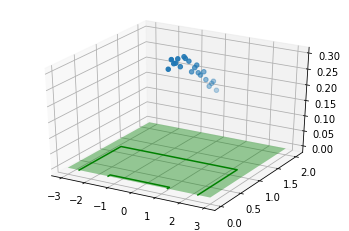

In [24]:
plotPoints(dataset2)

In [25]:
x = gettingX(1/60,1/3,1/60)
print(len(x))

20


In [26]:
x2 = gettingX(-2/3,2/3,1/60)
print(len(x2))

81


### Regressão Linear

In [27]:
thetaX = [random.random(),random.random()]
linearRegression(a,x,dataset[0],thetaX,err)

1539
0.0003586952739931634


In [28]:
thetaY = [random.random(),random.random()]
linearRegression(a,x,dataset[1],thetaY,err)

1764
5.7394282324824956e-05


In [29]:
thetaZ = [random.random(),random.random()]
linearRegression(a,x,dataset[2],thetaZ,err)

1186
9.72862147170852e-05


In [30]:
Xline = []
Yline = []
Zline = []
for i in x:
    Xline.append(linearH(thetaX,i))
    Yline.append(linearH(thetaY,i))
    Zline.append(linearH(thetaZ,i))

In [31]:
print(thetaX)
print(thetaY)
print(thetaZ)

[-0.2078600864702032, -2.9705403100271814]
[2.10021958696311, -2.9918367948518774]
[0.12450987015214016, -0.028070176475092305]


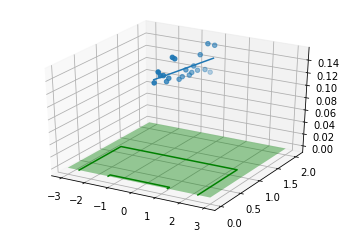

In [32]:
plotPolynom(dataset,Xline,Yline,Zline)

In [33]:
thetaX2 = [random.uniform(-1,1),random.uniform(-1,1)]
linearRegression(a,x,dataset2[0],thetaX2,err)

1519
0.000123405883714424


In [34]:
thetaY2 = [random.uniform(0,2),random.uniform(0,2)]
linearRegression(a,x,dataset2[1],thetaY2,err)

1817
5.739429513790087e-05


In [35]:
thetaZ2 = [random.random(),random.random()]
linearRegression(a,x,dataset2[2],thetaZ2,0.0001)

636
0.00014763130995373023


In [36]:
Xline2 = []
Yline2 = []
Zline2 = []
for i in x:
    Xline2.append(linearH(thetaX2,i))
    Yline2.append(linearH(thetaY2,i))
    Zline2.append(linearH(thetaZ2,i))

In [37]:
print(Xline2)

[-0.13040362498597943, -0.15490879299857735, -0.17941396101117527, -0.20391912902377318, -0.22842429703637107, -0.25292946504896896, -0.2774346330615669, -0.30193980107416485, -0.32644496908676274, -0.3509501370993606, -0.37545530511195857, -0.39996047312455646, -0.4244656411371544, -0.44897080914975235, -0.47347597716235024, -0.4979811451749481, -0.5224863131875461, -0.546991481200144, -0.5714966492127418, -0.5960018172253398]


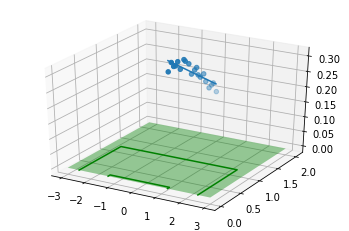

In [38]:
plotPolynom(dataset2,Xline2,Yline2,Zline2)

### Regressão Polinomial

In [39]:
grau = 1
thetaXg1 = []
for i in range(grau+1):
    thetaXg1.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg1,err,grau)

50000
0.00035865552631578895


In [40]:
grau = 1
thetaYg1 = []
for i in range(grau+1):
    thetaYg1.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg1,err,grau)

50000
5.738795112781932e-05


In [41]:
grau = 1
thetaZg1 = []
for i in range(grau+1):
    thetaZg1.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg1,err,grau)

50000
9.727548872180453e-05


In [42]:
Xlineg1 = []
Ylineg1 = []
Zlineg1 = []
for i in x:
    Xlineg1.append(generalH(thetaXg1,i))
    Ylineg1.append(generalH(thetaYg1,i))
    Zlineg1.append(generalH(thetaZg1,i))

In [43]:
print(thetaXg1)
print(thetaYg1)
print(thetaZg1)

[-0.20734210526316632, -2.9734736842104783]
[2.1004263157894636, -2.9930075187969374]
[0.12477894736842093, -0.02959398496240541]


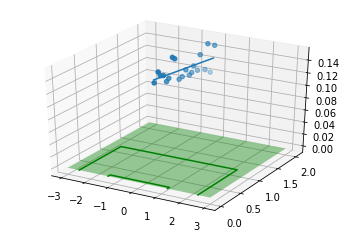

In [44]:
plotPolynom(dataset,Xlineg1,Ylineg1,Zlineg1)

In [45]:
grau = 2
thetaXg2 = []
for i in range(grau+1):
    thetaXg2.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg2,err,grau)

50000
0.00026377251098927916


In [46]:
grau = 2
thetaYg2 = []
for i in range(grau+1):
    thetaYg2.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg2,err,grau)

50000
5.9126520726327715e-05


In [47]:
grau = 2
thetaZg2 = []
for i in range(grau+1):
    thetaZg2.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg2,err,grau)

50000
9.24188510259078e-05


In [48]:
Xlineg2 = []
Ylineg2 = []
Zlineg2 = []
for i in x:
    Xlineg2.append(generalH(thetaXg2,i))
    Ylineg2.append(generalH(thetaYg2,i))
    Zlineg2.append(generalH(thetaZg2,i))

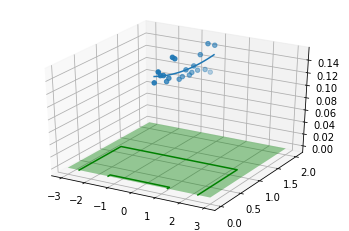

In [49]:
plotPolynom(dataset,Xlineg2,Ylineg2,Zlineg2)

In [50]:
grau = 5
thetaXg5 = []
for i in range(grau+1):
    thetaXg5.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg5,err,grau)

50000
0.0002618781940436772


In [51]:
grau = 5
thetaYg5 = []
for i in range(grau+1):
    thetaYg5.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg5,err,grau)

50000
5.699893633168397e-05


In [52]:
grau = 5
thetaZg5 = []
for i in range(grau+1):
    thetaZg5.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg5,err,grau)

50000
9.517403112223925e-05


In [53]:
Xlineg5 = []
Ylineg5 = []
Zlineg5 = []
for i in x:
    Xlineg5.append(generalH(thetaXg5,i))
    Ylineg5.append(generalH(thetaYg5,i))
    Zlineg5.append(generalH(thetaZg5,i))

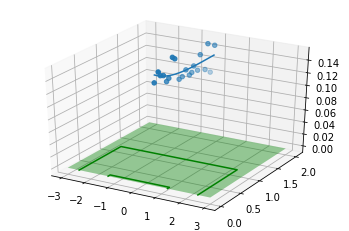

In [54]:
plotPolynom(dataset,Xlineg5,Ylineg5,Zlineg5)

In [55]:
grau = 10
thetaXg10 = []
for i in range(grau+1):
    thetaXg10.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg10,err,grau)

50000
0.0002609288352398164


In [56]:
print(thetaXg10)

[-0.1787434087429464, -3.4121243869657225, 0.9900859787517777, 0.8519305607335381, -0.23093716743257592, 1.0356697802990598, -0.737357886884381, -0.1549427683644666, 0.5171068694532459, -0.695147205236532, -0.021802247815964702]


In [ ]:
grau = 10
thetaYg10 = []
for i in range(grau+1):
    thetaYg10.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg10,err,grau)

In [ ]:
grau = 10
thetaZg10 = []
for i in range(grau+1):
    thetaZg10.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg10,err,grau)

In [ ]:
Xlineg10 = []
Ylineg10 = []
Zlineg10 = []
for i in x2:
    Xlineg10.append(generalH(thetaXg10,i))
    Ylineg10.append(generalH(thetaYg10,i))
    Zlineg10.append(generalH(thetaZg10,i))

In [ ]:
plotPolynom(dataset,Xlineg10,Ylineg10,Zlineg10)

In [ ]:
grau = 1
theta2Xg1 = []
for i in range(grau+1):
    theta2Xg1.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg1,err,grau)

In [ ]:
grau = 1
theta2Yg1 = []
for i in range(grau+1):
    theta2Yg1.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg1,err,grau)

In [ ]:
grau = 1
theta2Zg1 = []
for i in range(grau+1):
    theta2Zg1.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg1,err,grau)

In [ ]:
Xline2g1 = []
Yline2g1 = []
Zline2g1 = []
for i in x:
    Xline2g1.append(generalH(theta2Xg1,i))
    Yline2g1.append(generalH(theta2Yg1,i))
    Zline2g1.append(generalH(theta2Zg1,i))

In [ ]:
plotPolynom(dataset2,Xline2g1,Yline2g1,Zline2g1)

In [ ]:
grau = 1
theta2Xg2 = []
for i in range(grau+1):
    theta2Xg2.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg2,err,grau)

In [ ]:
grau = 1
theta2Yg2 = []
for i in range(grau+1):
    theta2Yg2.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg2,err,grau)

In [ ]:
grau = 2
theta2Zg2 = []
for i in range(grau+1):
    theta2Zg2.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg2,err,grau)

In [ ]:
Xline2g2 = []
Yline2g2 = []
Zline2g2 = []
for i in x:
    Xline2g2.append(generalH(theta2Xg2,i))
    Yline2g2.append(generalH(theta2Yg2,i))
    Zline2g2.append(generalH(theta2Zg2,i))

In [ ]:
plotPolynom(dataset2,Xline2g2,Yline2g2,Zline2g2)

In [ ]:
grau = 2
theta2Xg2t = []
for i in range(grau+1):
    theta2Xg2t.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg2t,err,grau)

In [ ]:
grau = 2
theta2Yg2t = []
for i in range(grau+1):
    theta2Yg2t.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg2t,err,grau)

In [ ]:
grau = 2
theta2Zg2t = []
for i in range(grau+1):
    theta2Zg2t.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg2t,err,grau)

In [ ]:
Xline2g2t = []
Yline2g2t = []
Zline2g2t = []
for i in x:
    Xline2g2t.append(generalH(theta2Xg2t,i))
    Yline2g2t.append(generalH(theta2Yg2t,i))
    Zline2g2t.append(generalH(theta2Zg2t,i))

In [ ]:
plotPolynom(dataset2,Xline2g2t,Yline2g2t,Zline2g2t)

In [ ]:
grau = 1
theta2Xg5 = []
for i in range(grau+1):
    theta2Xg5.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg5,err,grau)

In [ ]:
grau = 1
theta2Yg5 = []
for i in range(grau+1):
    theta2Yg5.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg5,err,grau)

In [ ]:
grau = 5
theta2Zg5 = []
for i in range(grau+1):
    theta2Zg5.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg5,err,grau)

In [ ]:
Xline2g5 = []
Yline2g5 = []
Zline2g5 = []
for i in x2:
    Xline2g5.append(generalH(theta2Xg5,i))
    Yline2g5.append(generalH(theta2Yg5,i))
    Zline2g5.append(generalH(theta2Zg5,i))

In [ ]:
plotPolynom(dataset2,Xline2g5,Yline2g5,Zline2g5)

In [ ]:
x3 = gettingX(-2/3,2,1/60)

In [ ]:
grau = 1
theta2Xg10 = []
for i in range(grau+1):
    theta2Xg10.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg10,err,grau)

In [ ]:
grau = 1
theta2Yg10 = []
for i in range(grau+1):
    theta2Yg10.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg10,err,grau)

In [ ]:
grau = 10
theta2Zg10 = []
for i in range(grau+1):
    theta2Zg10.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg10,err,grau)

In [ ]:
Xline2g10 = []
Yline2g10 = []
Zline2g10 = []
for i in x2:
    Xline2g10.append(generalH(theta2Xg10,i))
    Yline2g10.append(generalH(theta2Yg10,i))
    Zline2g10.append(generalH(theta2Zg10,i))

In [ ]:
plotPolynom(dataset2,Xline2g10,Yline2g10,Zline2g10)

### Variando a taxa de aprendizado

In [ ]:
grau = 1
thetaXg1a1 = []
for i in range(grau+1):
    thetaXg1a1.append(random.uniform(-1,1))
polynomialRegression(0.001,x,dataset[0],thetaXg1a1,err,grau)

In [ ]:
grau = 1
thetaYg1a1 = []
for i in range(grau+1):
    thetaYg1a1.append(random.uniform(0,2))
polynomialRegression(0.001,x,dataset[1],thetaYg1a1,err,grau)

In [ ]:
grau = 1
thetaZg1a1 = []
for i in range(grau+1):
    thetaZg1a1.append(random.random())
polynomialRegression(0.001,x,dataset[2],thetaZg1a1,err,grau)

In [ ]:
Xlineg1a1 = []
Ylineg1a1 = []
Zlineg1a1 = []
for i in x:
    Xlineg1a1.append(generalH(thetaXg1a1,i))
    Ylineg1a1.append(generalH(thetaYg1a1,i))
    Zlineg1a1.append(generalH(thetaZg1a1,i))

In [ ]:
plotPolynom(dataset,Xlineg1a1,Ylineg1a1,Zlineg1a1)

In [ ]:
grau = 1
theta2Xg2a1 = []
for i in range(grau+1):
    theta2Xg2a1.append(random.uniform(-1,1))
polynomialRegression(0.001,x,dataset2[0],theta2Xg2a1,err,grau)

In [ ]:
grau = 1
theta2Yg2a1 = []
for i in range(grau+1):
    theta2Yg2a1.append(random.uniform(0,2))
polynomialRegression(0.001,x,dataset2[1],theta2Yg2a1,err,grau)

In [ ]:
grau = 2
theta2Zg2a1 = []
for i in range(grau+1):
    theta2Zg2a1.append(random.random())
polynomialRegression(0.001,x,dataset2[2],theta2Zg2a1,err,grau)

In [ ]:
Xline2g2a1 = []
Yline2g2a1 = []
Zline2g2a1 = []
for i in x:
    Xline2g2a1.append(generalH(theta2Xg2a1,i))
    Yline2g2a1.append(generalH(theta2Yg2a1,i))
    Zline2g2a1.append(generalH(theta2Zg2a1,i))

In [ ]:
plotPolynom(dataset2,Xline2g2a1,Yline2g2a1,Zline2g2a1)

In [ ]:
grau = 1
thetaXg1a2 = []
for i in range(grau+1):
    thetaXg1a2.append(random.uniform(-1,1))
polynomialRegression(0.01,x,dataset[0],thetaXg1a2,err,grau)

In [ ]:
grau = 1
thetaYg1a2 = []
for i in range(grau+1):
    thetaYg1a2.append(random.uniform(0,2))
polynomialRegression(0.01,x,dataset[1],thetaYg1a2,err,grau)

In [ ]:
grau = 1
thetaZg1a2 = []
for i in range(grau+1):
    thetaZg1a2.append(random.random())
polynomialRegression(0.01,x,dataset[2],thetaZg1a2,err,grau)

In [ ]:
Xlineg1a2 = []
Ylineg1a2 = []
Zlineg1a2 = []
for i in x:
    Xlineg1a2.append(generalH(thetaXg1a2,i))
    Ylineg1a2.append(generalH(thetaYg1a2,i))
    Zlineg1a2.append(generalH(thetaZg1a2,i))

In [ ]:
plotPolynom(dataset,Xlineg1a2,Ylineg1a2,Zlineg1a2)

In [ ]:
grau = 1
theta2Xg2a2 = []
for i in range(grau+1):
    theta2Xg2a2.append(random.uniform(-1,1))
polynomialRegression(0.01,x,dataset2[0],theta2Xg2a2,err,grau)

In [ ]:
grau = 1
theta2Yg2a2 = []
for i in range(grau+1):
    theta2Yg2a2.append(random.uniform(0,2))
polynomialRegression(0.01,x,dataset2[1],theta2Yg2a2,err,grau)

In [ ]:
grau = 2
theta2Zg2a2 = []
for i in range(grau+1):
    theta2Zg2a2.append(random.random())
polynomialRegression(0.01,x,dataset2[2],theta2Zg2a2,err,grau)

In [ ]:
Xline2g2a2 = []
Yline2g2a2 = []
Zline2g2a2 = []
for i in x:
    Xline2g2a2.append(generalH(theta2Xg2a2,i))
    Yline2g2a2.append(generalH(theta2Yg2a2,i))
    Zline2g2a2.append(generalH(theta2Zg2a2,i))

In [ ]:
plotPolynom(dataset2,Xline2g2a2,Yline2g2a2,Zline2g2a2)

In [ ]:
grau = 1
thetaXg1a3 = []
for i in range(grau+1):
    thetaXg1a3.append(random.uniform(-1,1))
polynomialRegression(0.1,x,dataset[0],thetaXg1a3,err,grau)

In [ ]:
grau = 1
thetaYg1a3 = []
for i in range(grau+1):
    thetaYg1a3.append(random.uniform(0,2))
polynomialRegression(0.1,x,dataset[1],thetaYg1a3,err,grau)

In [ ]:
grau = 1
thetaZg1a3 = []
for i in range(grau+1):
    thetaZg1a3.append(random.random())
polynomialRegression(0.1,x,dataset[2],thetaZg1a3,err,grau)

In [ ]:
Xlineg1a3 = []
Ylineg1a3 = []
Zlineg1a3 = []
for i in x:
    Xlineg1a3.append(generalH(thetaXg1a2,i))
    Ylineg1a3.append(generalH(thetaYg1a2,i))
    Zlineg1a3.append(generalH(thetaZg1a2,i))

In [ ]:
plotPolynom(dataset,Xlineg1a3,Ylineg1a3,Zlineg1a3)

In [ ]:
grau = 1
theta2Xg2a3 = []
for i in range(grau+1):
    theta2Xg2a3.append(random.uniform(-1,1))
polynomialRegression(0.1,x,dataset2[0],theta2Xg2a3,err,grau)

In [ ]:
grau = 1
theta2Yg2a3 = []
for i in range(grau+1):
    theta2Yg2a3.append(random.uniform(0,2))
polynomialRegression(0.1,x,dataset2[1],theta2Yg2a3,err,grau)

In [ ]:
grau = 2
theta2Zg2a3 = []
for i in range(grau+1):
    theta2Zg2a3.append(random.random())
polynomialRegression(0.1,x,dataset2[2],theta2Zg2a3,err,grau)

In [ ]:
Xline2g2a3 = []
Yline2g2a3 = []
Zline2g2a3 = []
for i in x:
    Xline2g2a3.append(generalH(theta2Xg2a3,i))
    Yline2g2a3.append(generalH(theta2Yg2a3,i))
    Zline2g2a3.append(generalH(theta2Zg2a3,i))

In [ ]:
plotPolynom(dataset2,Xline2g2a3,Yline2g2a3,Zline2g2a3)

In [ ]:
grau = 1
thetaXg1a4 = []
for i in range(grau+1):
    thetaXg1a4.append(random.uniform(-1,1))
polynomialRegression(1,x,dataset[0],thetaXg1a4,err,grau)

In [ ]:
grau = 1
thetaYg1a4 = []
for i in range(grau+1):
    thetaYg1a4.append(random.uniform(0,2))
polynomialRegression(1,x,dataset[1],thetaYg1a4,err,grau)

In [ ]:
grau = 1
thetaZg1a4 = []
for i in range(grau+1):
    thetaZg1a4.append(random.random())
polynomialRegression(1,x,dataset[2],thetaZg1a4,err,grau)

In [ ]:
Xlineg1a4 = []
Ylineg1a4 = []
Zlineg1a4 = []
for i in x:
    Xlineg1a4.append(generalH(thetaXg1a4,i))
    Ylineg1a4.append(generalH(thetaYg1a4,i))
    Zlineg1a4.append(generalH(thetaZg1a4,i))

In [ ]:
plotPolynom(dataset,Xlineg1a4,Ylineg1a4,Zlineg1a4)

In [ ]:
grau = 1
theta2Xg2a4 = []
for i in range(grau+1):
    theta2Xg2a4.append(random.uniform(-1,1))
polynomialRegression(1,x,dataset2[0],theta2Xg2a4,err,grau)

In [ ]:
grau = 1
theta2Yg2a4 = []
for i in range(grau+1):
    theta2Yg2a4.append(random.uniform(0,2))
polynomialRegression(1,x,dataset2[1],theta2Yg2a4,err,grau)

In [ ]:
grau = 2
theta2Zg2a4 = []
for i in range(grau+1):
    theta2Zg2a4.append(random.random())
polynomialRegression(1,x,dataset2[2],theta2Zg2a4,err,grau)

In [ ]:
Xline2g2a4 = []
Yline2g2a4 = []
Zline2g2a4 = []
for i in x:
    Xline2g2a4.append(generalH(theta2Xg2a4,i))
    Yline2g2a4.append(generalH(theta2Yg2a4,i))
    Zline2g2a4.append(generalH(theta2Zg2a4,i))

In [ ]:
plotPolynom(dataset2,Xline2g2a4,Yline2g2a4,Zline2g2a4)

In [ ]:
grau = 1
thetaXg1a5 = []
for i in range(grau+1):
    thetaXg1a5.append(random.uniform(-1,1))
polynomialRegression(2,x,dataset[0],thetaXg1a5,err,grau)

In [ ]:
grau = 1
thetaYg1a5 = []
for i in range(grau+1):
    thetaYg1a5.append(random.uniform(0,2))
polynomialRegression(2,x,dataset[1],thetaYg1a5,err,grau)

In [ ]:
grau = 1
thetaZg1a5 = []
for i in range(grau+1):
    thetaZg1a5.append(random.random())
polynomialRegression(2,x,dataset[2],thetaZg1a5,err,grau)

In [ ]:
Xlineg1a5 = []
Ylineg1a5 = []
Zlineg1a5 = []
for i in x:
    Xlineg1a5.append(generalH(thetaXg1a5,i))
    Ylineg1a5.append(generalH(thetaYg1a5,i))
    Zlineg1a5.append(generalH(thetaZg1a5,i))

In [ ]:
plotPolynom(dataset,Xlineg1a5,Ylineg1a5,Zlineg1a5)

In [ ]:
grau = 1
theta2Xg2a5 = []
for i in range(grau+1):
    theta2Xg2a5.append(random.uniform(-1,1))
polynomialRegression(2,x,dataset2[0],theta2Xg2a5,err,grau)

In [ ]:
grau = 1
theta2Yg2a5 = []
for i in range(grau+1):
    theta2Yg2a5.append(random.uniform(0,2))
polynomialRegression(2,x,dataset2[1],theta2Yg2a5,err,grau)

In [ ]:
grau = 2
theta2Zg2a5 = []
for i in range(grau+1):
    theta2Zg2a5.append(random.random())
polynomialRegression(2,x,dataset2[2],theta2Zg2a5,err,grau)

In [ ]:
Xline2g2a5 = []
Yline2g2a5 = []
Zline2g2a5 = []
for i in x:
    Xline2g2a5.append(generalH(theta2Xg2a5,i))
    Yline2g2a5.append(generalH(theta2Yg2a5,i))
    Zline2g2a5.append(generalH(theta2Zg2a5,i))

In [ ]:
plotPolynom(dataset2,Xline2g2a5,Yline2g2a5,Zline2g2a5)

In [ ]:
print(Xlineg1a5)
print(Ylineg1a5)
print(Zlineg1a5)

### Avaliação do erro

Os resultados ficaram nas seguintes variáveis: 

Variável   | Resultado
---------  | ---------
Dlinen     | Resultado regressão linear na dimensão D e chute n
Dlinengm   | Resultado regressão polinomial na dimensão D, chute n e grau m
Dline2g2t  | Resultado de teste para regressão polinomial de grau 2
Dlinengmas | Resultado regressão polinomial na dimensão D, chute n, grau m e learning rate a = s  

**Tabela 1:** Explicação dos nomes dos resultados

#### Efeito do grau

In [ ]:
Xrmse = rmse(Xline,dataset[0])
Yrmse = rmse(Yline,dataset[1])
Zrmse = rmse(Zline, dataset[2])
Xrse = rse(Xline,dataset[0])
Yrse = rse(Yline,dataset[1])
Zrse = rse(Zline, dataset[2])
print("RMSE regressão Linear Chute 1:")
print("X:",Xrmse)
print("Y:", Yrmse)
print("Z", Zrmse)
print("RSE regressão Linear Chute 1:")
print("X:", Xrse)
print("Y:", Yrse)
print("Z:", Zrse)

In [ ]:
Xrmseg2 = rmse(Xlineg2,dataset[0])
Yrmseg2 = rmse(Ylineg2,dataset[1])
Zrmseg2 = rmse(Zlineg2, dataset[2])
Xrseg2 = rse(Xlineg2,dataset[0])
Yrseg2 = rse(Ylineg2,dataset[1])
Zrseg2 = rse(Zlineg2, dataset[2])
print("RMSE regressão Polinomial grau 2 Chute 1:")
print("X:",Xrmseg2)
print("Y:", Yrmseg2)
print("Z", Zrmseg2)
print("RSE regressão Polinomial grau 2 Chute 1:")
print("X:",Xrseg2)
print("Y:", Yrseg2)
print("Z:", Zrseg2)

In [ ]:
Xrmseg5 = rmse(Xlineg5,dataset[0])
Yrmseg5 = rmse(Ylineg5,dataset[1])
Zrmseg5 = rmse(Zlineg5, dataset[2])
Xrseg5 = rse(Xlineg5,dataset[0])
Yrseg5 = rse(Ylineg5,dataset[1])
Zrseg5 = rse(Zlineg5, dataset[2])
print("RMSE regressão Polinomial grau 5 Chute 1:")
print("X:",Xrmseg5)
print("Y:", Yrmseg5)
print("Z", Zrmseg5)
print("RSE regressão Polinomial grau 5 Chute 1:")
print("X:",Xrseg5)
print("Y:", Yrseg5)
print("Z:", Zrseg5)

In [ ]:
Xrmseg10 = rmse(Xlineg10,dataset[0])
Yrmseg10 = rmse(Ylineg10,dataset[1])
Zrmseg10 = rmse(Zlineg10, dataset[2])
Xrseg10 = rse(Xlineg10,dataset[0])
Yrseg10 = rse(Ylineg10,dataset[1])
Zrseg10 = rse(Zlineg10, dataset[2])
print("RMSE regressão Polinomial grau 10 Chute 1:")
print("X:",Xrmseg10)
print("Y:", Yrmseg10)
print("Z", Zrmseg10)
print("RSE regressão Polinomial grau 10 Chute 1:")
print("X:",Xrseg10)
print("Y:", Yrseg10)
print("Z", Zrseg10)